In [1]:
import panel as pn; import holoviews as hv
pn.extension();     hv.extension('bokeh', logo=None)
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Systems of Linear Equations (Part I)</strong><br>
    <strong style="height:100px;color:darkred;font-size:30px;">Row Echelon Form and Backsubstitution</strong>
</div>

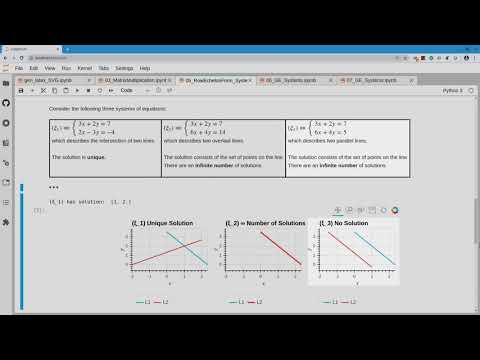

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("rH0EdQRDO1A", 400, 200, frameborder="0",
      allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture",
      allowfullscreen=True)

# 1. Systems of Linear Equations

## 1.1 Definition

<div style="float:left;background-color:#F2F5A9;color:black;width:48%;height:6.5cm;">
<strong>Definition:</strong> A <strong>system of $m$ linear equation in $n$ unknowns</strong><br> $\qquad$ (in equation form)
is a set of equations of the form<br><br>
$\qquad\qquad
\begin{align}
&a_{1 1} x_1 + a_{1 2} x_2 + \dots a_{1 n} x_n &= b_1 \\
&a_{2 1} x_1 + a_{2 2} x_2 + \dots a_{2 n} x_n &= b_2 \\
&\dots \quad & \;\; \dots \\
&a_{m 1} x_1 + a_{m 2} x_2 + \dots a_{m n} x_n &= b_m \\
\end{align}
$
<br><br>
$\qquad$ the <strong>coefficients</strong> $a_{i j}$ and the <strong>right hand sides</strong> $b_i$ are known scalars in $\mathbb{F}$.<br>
$\qquad$ The variables $x_i$ are <strong>unknown</strong>.
</div>
<div style="float:right;background-color:#F2F5A9;color:black;width:51%;height:6.5cm;">
<strong>Definition:</strong> A <strong>system of $m$ linear equation in $n$ unknowns</strong> is a matrix equation of the form<br>
$\qquad\qquad\qquad \color{darkred}{ A x = b}, $<br>
$\qquad$ where the <strong> coefficient matrix</strong> $A \in \mathbb{F}^{m \times n}$<br>
$\qquad$ and the <strong>right hand side vector</strong> $b \in \mathbb{F}^m$ are given,<br>
$\qquad$ and $x \in \mathbb{F}^n$ is the <strong>vector of unknowns:</strong><br><br>
$\qquad\qquad
A = \begin{pmatrix}
a_{1 1} & a_{1 2} & \dots & a_{1 n} \\
a_{2 1} & a_{2 2} & \dots & a_{2 n} \\
\dots   & \dots   & \dots & \dots   \\
a_{m 1} & a_{m 2} & \dots & a_{m n} \\
\end{pmatrix}, \quad
b = \begin{pmatrix} b_{1} \\ b_{2} \\ \dots \\ b_{m} \\\end{pmatrix}, \quad
x =\begin{pmatrix} x_{1} \\ x_{2} \\ \dots \\ x_{n} \\\end{pmatrix}
$
</div>

#### **Examples**

<div style="float:left;width:48%;height:5.5cm;">

| Equations | Comment |
| ---- | ---- |
| $3 x = 5 \quad$ |  a system of 1 equation in 1 unknown |
| $\left\{ \begin{align} 3 x &= 5 \\ 6 x &= 10 \end{align} \right.  \quad$ | a system of 2 equations in 1 unknown |
| $\left\{ \begin{align} 3 x + 2 y - z &= 4 \\ 6 x - 5 y &= 10 \end{align} \right.  \quad$ | a system of 2 equations in 3 unknowns |
| $\left\{ \begin{align} 3 x + 2 y - z &= 5 \\ 6 \sin (x) + y &= 10 \end{align} \right.  \quad$ | a nonlinear system |
</div>
<div style="float:left;width:48%;height:5.5cm;">

| Equations | Comment |
| ---- | ---- |
| $ ( 3 ) ( x ) = ( 5 ) \quad$ |  a system of 1 equation in 1 unknown |
| $ \begin{pmatrix} 3 \\ 6  \end{pmatrix}\; ( x ) = \begin{pmatrix} 5 \\ 10 \end{pmatrix} \quad$ | a system of 2 equations in 1 unknown |
| $ \begin{pmatrix} 3 & 2 & -1 \\ 6 & -5 & 0 \end{pmatrix}\;  \begin{pmatrix} x \\ y \\ z \end{pmatrix}\; = \; \begin{pmatrix} 4 \\ 10 \end{pmatrix} \quad$ | $\text{a system of 2 equations in 3 unknowns}$ |
| No matrix vector product representation| |
</div>

**Remarks:**
* partitioning the $A$ matrix into rows yields the **row view** of the system<br><br>
$\qquad \left( \begin{matrix} 3 & 2 & -1 \\ \hline 6 & -5 & 0 \end{matrix} \right) \;
   \begin{pmatrix} x \\ y \\ z \end{pmatrix}\;
   = \; \left( \begin{matrix} 4 \\ \hline 10 \end{matrix} \right)
   \; \Leftrightarrow \; \left\{   \begin{align} 3 x + 2 y - z &= 4 \\ 6 x - 5 y &= 10 \end{align} \right.
$

* partitioning the $A$ matrix into columns yields the **column view** of the system<br><br>
$\qquad \left( \begin{array}{r|r|r} 3 & 2 & -1 \\6 & -5 & 0 \end{array} \right) \;
   \begin{pmatrix} x \\ \hline y \\ \hline z \end{pmatrix}\;
   = \; \left( \begin{matrix} 4 \\ 10 \end{matrix} \right)
   \; \Leftrightarrow \; x \begin{pmatrix} 3 \\ 6 \end{pmatrix} +  y \begin{pmatrix} 2 \\ -5 \end{pmatrix} + z  \begin{pmatrix} -1 \\ 0 \end{pmatrix} =  \begin{pmatrix} 4 \\ 10 \end{pmatrix}
$

## 1.2 Solutions of a System of Linear Equations

<div style="float:left;background-color:#F2F5A9;color:black;width:80%;">
<strong>Definition:</strong> A <strong>solution</strong> to a linear system of equations $A x = b$ is an assignment of values to the variable $x$<br>
    $\qquad$ such that all the equations are simultaneously satisfied

#### **Example**

Consider the following three systems of equations:

<div style="float:left;width:27%;height:4cm;border:2px solid black;">
$\;(\xi_1) \Leftrightarrow \left\{ \begin{align} 3 x + 2 y &= 7 \\ 2 x - 3 y &= -4 \end{align} \right. $<br>
$\;$which describes the intersection of two lines.<br><br>
$\;$The solution is <strong>unique.</strong>
</div>
<div style="float:left;width:30%;height:4cm;border-top:2px solid black;border-bottom:2px solid black;">
$\;(\xi_2) \Leftrightarrow \left\{ \begin{align} 3 x + 2 y &= 7 \\ 6 x + 4 y &= 14 \end{align} \right. $<br>
$\;$which describes two overlaid lines.<br><br>
$\;$The solution consists of the set of points on the line<br>
$\;$There are an <strong>infinite number</strong> of solutions.
</div>
<div style="float:left;width:30%;height:4cm;border:2px solid black;">
$\;(\xi_3) \Leftrightarrow \left\{ \begin{align} 3 x + 2 y &= 7 \\ 6 x + 4 y &= 5 \end{align} \right. $<br>
$\;$which describes two parallel lines.<br><br>
$\;$The solution consists of the set of points on the line<br>
$\;$There are an <strong>infinite number</strong> of solutions.
</div>

In [6]:
A=np.array( [[3, 2], [2, -3]] ); b = np.array([7,-4])
print()
print( "(ξ_1) has solution: ", np.linalg.solve(A, b))

h1 = hv.Curve(([7.0/3, 0], [0, 7.0/2]), label='L1' )*hv.Curve(([-2,2], [0, 8.0/3]), label='L2' )
h2 = hv.Curve(([7.0/3, 0], [0, 7.0/2]), label='L1'  )*hv.Curve(([7.0/3, 0], [0, 7.0/2]), label='L2' ).opts(line_width=5,alpha=0.5, muted_alpha=0)
h3 = hv.Curve(([7.0/3, 0], [0, 7.0/2]), label='L1'  )*hv.Curve(([-1.5, 1], [(5.+6.*1.5)/4, (5.-6.)/4]), label='L2'  )

h1.opts(title="(ξ_1) Unique Solution",width=250,height=250, legend_position='bottom', show_grid=True)+\
h2.opts(title="(ξ_2) ∞ Number of Solutions",width=250,height=250, legend_position='bottom', show_grid=True)+\
h3.opts(title="(ξ_3) No Solution",width=250,height=250, legend_position='bottom', show_grid=True)


(ξ_1) has solution:  [1. 2.]


:Layout
   .Overlay.I   :Overlay
      .Curve.L1 :Curve   [x]   (y)
      .Curve.L2 :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.L1 :Curve   [x]   (y)
      .Curve.L2 :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.L1 :Curve   [x]   (y)
      .Curve.L2 :Curve   [x]   (y)

**Remarks:**
* The solution algorithm we will develop will show these numbers of solutions to be the only possible:<br>
$\qquad$ **no solution**, **a unique solution**, or **an infinite number of solutions**
* We therefore need to talk about **sets of solutions** for linear systems of equations $A x = b$

# 2. Solutions of Row Echelon Form Systems

## 2.1 Two Simple Examples

#### **Example 1**

Consider the system $(\xi_1) \Leftrightarrow \left\{ \begin{align} x+ 3 y & = 5 \\ 2 y & = 2 \end{align} \right.$

> We notice it is easy to solve "from the bottom up"  (**"backwards"**):
>
> * Start with the last equation $2 y = 2 \quad \Leftrightarrow y = 1$
> * Now substitute the solution $y = 1$ into the previous equation:<br>
> $\qquad\qquad\qquad\qquad$ $ x + 3 y \; \big|_{\ y=1} = 5 \quad \Leftrightarrow \; x = 5-3 = 2$

> We have obtained the **unique solution** $\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$

#### **Example 2**

Consider the system $(\xi_2) \Leftrightarrow \left\{ \begin{align} x + 3 y - z & = 6 \\ 2 y - z & = 2 \\ 4 z &= 16 \end{align} \right.$

> We notice it is again easy to solve "from the bottom up"  (**"backwards"**):
>
> * Start with the last equation $4 z = 16 \quad \Leftrightarrow z = 4$
> * Now substitute the solution $z = 4$ into the previous equation:<br>
> $\qquad\qquad\qquad\qquad$ $ 2 y - z \; \big|_{\ {z=4}} = 2 \quad \Leftrightarrow \; y = \frac{1}{2} ( 2 + 4 ) = 3$
> * Finally substitute the solutions $y=3, z=4$ into the first equation:<br>
> $\qquad\qquad\qquad\qquad$ $ x + 3 y - z \; \big|_{\ {y=3 \\ z=4}} = 6 \quad \Leftrightarrow \; x = ( 6 - 3 \times 3 + 4 ) = 1$

> We have obtained the **unique solution** $\begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 1 \\ 3 \\ 4 \end{pmatrix}$

#### **What Makes this Work?**

Looking at these two examples, we see that
* the first variable (i.e., the **leading** variable is different in each case
    * the first variable $x$ is the leading variable in the first equation
    * the second variable $y$ is the leading variable in the second equation
    * the third variable $z$ is the leading variable in the third equation
    * $\dots$

* as long as we have an equation for each of the variables,<br>
  **a system satisfying this pattern can easily be solved from the bottom up!**

## 2.2 Systems that do NOT have an Equation for Each of the Variables

#### **Example 1**

Consider $(\xi_1) \Leftrightarrow x + 2 y - z = 1$

> There are three variables, but only one constraint. If we **choose $y$ and $z$ to be any values**, we can solve for the leading variable $x$!
>
> Let $y = \alpha$, $z = \beta$ where $\alpha$ and $\beta$ are parameters allowed to take on any value, then<br>$\qquad$ $x = 1 -2 y + z \ \bigg|_{y=\alpha,\; z=\beta} = 1 - 2 \alpha + \beta$

> By convention, we will write solutions in vector notation. This is known as the **standard form** of the solution:
>
> $\qquad\left. \begin{align} x &= 1 - 2 \alpha + \beta \\ y &= \alpha \\ z &= \beta \end{align} \right\}\; \Leftrightarrow \;
\begin{pmatrix} x\\ y \\ z \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} + \alpha  \begin{pmatrix} -2 \\ 1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} $

> **Remark:** The original equation is readily recognized as a plane with a normal vector $(1, 2, -1)$.<br>
> $\qquad$ The solution represents the same plane as **a linear combination of two vectors** in the plane<br>
> $\qquad$ **pushed away from the origin** by the vector $(1, 0, 0)$

**Important Remarks:**
* $\qquad$ We could have rewritten the equation with a **different leading variable**, i.e., $(\xi_1) \Leftrightarrow -z + x + 2 y = 1$<br>
$\qquad$ The solution then becomes<br>
$\qquad\qquad
\begin{pmatrix} x\\ y \\ z \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix} + \alpha  \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \\ 2 \end{pmatrix} $<br>
* The solution may look different, but it describes **the same plane** pushed away from the origin!
* The **number of variables** for which we do not have constraints **does not change!**

#### **Example 2**

Consider the system<br><br>
$\qquad(\xi_2) \Leftrightarrow \left\{ \begin{align} -2 x_1 & + x_2 - x_3 + x_4 &= 0 \\ & - x_2 + x_3 + 2 x_4 &= 1 \end{align} \right.$

> The leading variables are $x_1$ and $x_2$.<br>
> $\qquad$ We are free to choose any values for the remaining variables,<br>
> $\qquad$ and write down the corresponding solution for the leading variables.<br>

> Let $x_3 = \alpha, x_4 = \beta,$ where $\alpha$ and $\beta$ are parameters allowed to take on any value.by
> Solving backwards, we get<br><br>
> $\qquad\begin{align}x_2 &= -\left( 1 - x_3 - 2 x_4 \right) \bigg|_{x_3=\alpha,\; x_4=\beta} \\ &= -1 + \alpha + 2 \beta \end{align}$<br>
>
> and<br>
> $\qquad  \begin{align}
x_1 &= -\frac{1}{2} \left( 0 - x_2 + x_3 - x_4 \right) \ \bigg|_{x_2 = -1 + \alpha + 2 \beta,\; x_3 = \alpha, x_4 = \beta} \\
    &= \frac{1}{2}+\frac{3}{2} \beta
\end{align}$

> In standard form, we see that<br><br>
> $\qquad
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} \frac{1}{2} \\ -1 \\ 0 \\ 0 \end{pmatrix} + \alpha \begin{pmatrix} 0 \\ 1 \\ 1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} \frac{3}{2} \\ 2  \\ 0 \\ 1 \end{pmatrix}
$

> Note that we could have **rearranged** the problem to make $x_3$ or $x_4$ **the leading variable** in the second equation.<br>
> <div><strong style="height:100px;color:darkred;font-size:20px;">Try It! What does the standard form look like?</strong></div>

# 3. The Backsubstitution Algorithm

Let us look at these simple systems in matrix form, and introduce some vocabulary.

#### **Example 1**

Consider the system from the previous section, and rewrite it in matrix form, with the leading variables shown in a box:
$$\begin{aligned}
(\xi_1) & \Leftrightarrow \left\{ \begin{align} -2 x_1 & + x_2 - x_3 +& x_4 &= 0 \\
                                                       & - x_2 + x_3 +& 2 x_4 &= 1\\
                                                       &              & 3 x_4 &= 5 \end{align} \right. \\
        & \Leftrightarrow \begin{pmatrix} \boxed{\color{darkred}{-2}} & 1 & -1 & 4 \\
                                           0            &\boxed{ \color{darkred}{-1}} & 1 & 2 \\
         0 & 0 & 0 & \boxed{ \color{darkred}{4}}\end{pmatrix}
                          \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 5\end{pmatrix}
\end{aligned}$$

**Remark:** We need to **recognize the simple systems** we have been discussing when they are **in matrix form!**

## 3.1 Definition

We really should talk about relative index positions on what follows. For convenience
* a row **above** a given row or a **previous row** to a given row will mean a row with a lower row index than the row index of the given row.
* a column to the **left** of a given column will mean a colum with a lower column index than the column index of the given column.
* a row **below** a given row, and a column to the **left** of a given row will be similarly defined.

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Definition:** A matrix is in **row echelon form** iff
* the leading entry (i.e., the first non-zero entry) in any given row is to the right of the leading entry in any row above the given row
* no row with a leading entry appears below a row with all zero entries.
    
**Definition:** the leading entries are **pivots**, the **pivot row** and **pivot columns** are the row and column indices

**Definition:** variables that do not have pivots are **free variables.**<br>
    $\qquad\quad\;\;$ variables that do have pivots are **basic variables.**
</div>

<img src="Figs/rowechelon_form.svg" style="margin:0px 0px 0cm 2cm;width:20cm;">

#### **Augmented Form**

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Definition:** The **augmented form** of a system of linear equations $A x = b$ is the matrix $\left( A \ \big| \ b \right)$
</div>

<div style="float:left;width:50%;font-size:18px;margin:10px 10px 0cm 0cm;"> Matrix Multiplication   A x = b <img src="Figs/augmented_matrix_1.svg" style="margin:0px 0px 0cm 4cm;width:70%"></div>
<div style="float:left;font-size:18px;border:2px solid black;padding:5px;"> <strong>Notation Convention</strong> for hand computations<br><br><img src="Figs/augmented_matrix_2.svg" style="margin:0px 10px 0.5cm 0.5cm;width:11cm;"></div>

## 3.2 The Algorithm

<div style="float:left;background-color:#F2F5A9;color:black;width:100%;">

**Backsubstitution Algorithm:** Given a system in row echelon form
* assign different parameters for each of the free variables (if any)
* transcribe the equations and solve starting at the last equation and working backwards
</div>

#### **Example 2**

<div style="float:left;font-size:18px;width:40%;"> Consider the following system <br> <img src="Figs/augmented_matrix_3.svg" style="margin:0px 0px 0cm 3cm;width:10cm;"></div>

<div style="float:left;font-size:15px;margin:0cm 0cm 0cm 2cm;">

> <strong>Step 1: </strong> Make sure the system is in row echelon form<br>
<strong>Step 2: </strong> Assign parameters to each of the free variables<br> 
<strong>Step 3: </strong> Transcribe the equations and solve from the bottom up<br>
<strong>Step 4: </strong> Write the solution in standard form
</div>

> **Step 3:** solve each equation in turn from last to first<br><br>
>$\qquad\left.
\begin{align}
{
\left.
\begin{aligned} \boxed{ x_2 = \alpha} & \\
              \boxed{x_4 = \beta} & \\
              x_3 = \frac{1}{2} \left( -1 - x_4 \right) & \end{aligned}
\right\}  \; \Rightarrow \; \qquad \boxed{x_3 = - \frac{1}{2} -\frac{1}{2} \beta}
} & \\
& \\
 x_1 = 5 - 2 x_2 - x_3 - x_4 &
\end{align}
\right\} \; \Rightarrow \;
\boxed{x_1 = \frac{11}{2} - 2 \alpha  -\frac{1}{2} \beta }
$

> **Step 4:** Write the solution in standard form<br><br>
> $\qquad \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} \; = \;
\frac{1}{2}\left(\begin{array}{r} 11 \\ 0 \\ -1 \\ 0 \end{array}\right) \; + \;
\alpha\ \frac{1}{2}\left(\begin{array}{r} -4 \\ 2 \\ 0 \\ 0\end{array}\right)  \; + \;
\beta\ \frac{1}{2}\left(\begin{array}{r} -1 \\ 0 \\ -1 \\ 2 \end{array}\right)
$

**Remarks:**
* the geometric representation of the solution is **a k-plane pushed away from the origin** by a constant vector
* **Any choice of $\alpha, \beta$ is a valid solution**, in particular, the choice $x_2 = \alpha=0,\; x_4=\beta=0$ is the constant vector in the solution above

* the **form of the solution** is not unique: e.g.,<br> setting $\alpha = 1 + \tilde{\alpha}, \; \beta = \tilde{\alpha} + \tilde{\beta}$ yields a solution **representing the same plane**<br><br>
$\qquad \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} \; = \;
\frac{1}{2}\begin{pmatrix}7 \\ 2 \\ -1 \\ 0 \end{pmatrix} \; + \;
\tilde{\alpha}\ \frac{1}{2}\begin{pmatrix} -5 \\ 2 \\ -1 \\ 2\end{pmatrix}  \; + \;
\tilde{\beta}\ \frac{1}{2}\begin{pmatrix} -1 \\ 0 \\ -1 \\ 2 \end{pmatrix} 
$

* **check the solution** by substituting each of the vectors:
    * the constant solution must satisfy $A x = b$
    * as we shall see later, each of the other vectors must satisfy $A x = 0$

# 4. Take Away

* Important concepts: **augmented matrix,** **row echelon form**, **pivot,**  **basic and free variables**

* Systems in **row echelon form** are easy to solve by the **backsubstitution algorithm**

* The geometric representation of **the solution is a k-plane** pushed away from the origin by a constant vector